# Sparse linear equations

**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demlin03.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Ago-19</i>
<hr>

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from scipy.sparse import csc_matrix
np.set_printoptions(precision=4)
plt.style.use('seaborn-dark')
plt.style.use('seaborn-talk')

Define some timing functions

In [2]:
tic = lambda: timer()
toc = lambda t: timer() - t

Compute the time to solve a system of equations, for full and sparce matrices

In [3]:
N, M = 800, 100

AA = np.random.rand(N, N)
bb = np.random.rand(N, 1)
for i in range(N):
    for j in range(N):
        if abs(i - j) > 1:
            AA[i,j] = 0

nvalues = np.arange(20,N+1,30)
times = pd.DataFrame(index=nvalues, columns=['Using full matrix','Using sparse matrix'])
times.index.name='n'

for n in nvalues:
    A = AA[:n, :n]
    b = bb[:n]
    tt = tic()
    for i in range(M):
        x = solve(A, b)

    toc1 = toc(tt)

    S = csc_matrix(A)
    tt = tic()
    for i in range(M):
        x = spsolve(S, b)

    toc2 = toc(tt)
    times.loc[n] = toc1, toc2

Plot effort ratio

[Text(0, 0.5, 'seconds'), Text(0.5, 1.0, 'Solve Time in seconds')]

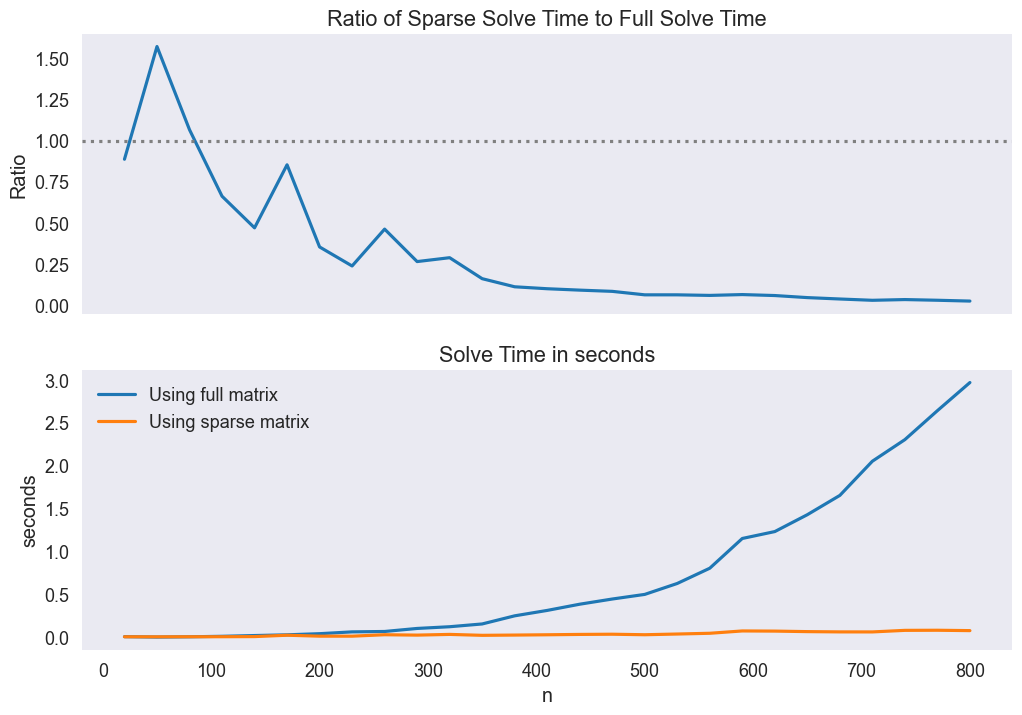

In [4]:
times['Ratio'] = times['Using sparse matrix'] / times['Using full matrix']

fig, axs = plt.subplots(2, 1, figsize=[12, 8], sharex=True)
times['Ratio'].plot(ax=axs[0])
axs[0].set(ylabel='Ratio', 
           title='Ratio of Sparse Solve Time to Full Solve Time')
axs[0].axhline(1.0, color='gray', linestyle=':')           

times[['Using full matrix', 'Using sparse matrix']].plot(ax=axs[1])
axs[1].set(ylabel='seconds', 
           title='Solve Time in seconds')

In [5]:
times

,Using full matrix,Using sparse matrix,Ratio
n,,,
20,0.0102,0.009,0.8866
50,0.0053,0.0084,1.5696
80,0.0087,0.0092,1.0656
110,0.0144,0.0095,0.6626
140,0.0232,0.0109,0.4709
170,0.0316,0.027,0.853
200,0.0449,0.0159,0.3552
230,0.0659,0.0158,0.2398
260,0.0705,0.0327,0.4632
